<a href="https://colab.research.google.com/github/hbansal27/Google_Play_Store_Apps_Ratings_EDA/blob/main/ML_Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Vijay Singh
##### **Team Member 2 -** Harshit Bansal


# **Project Summary -**

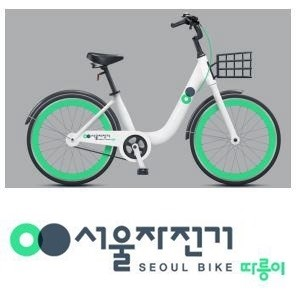










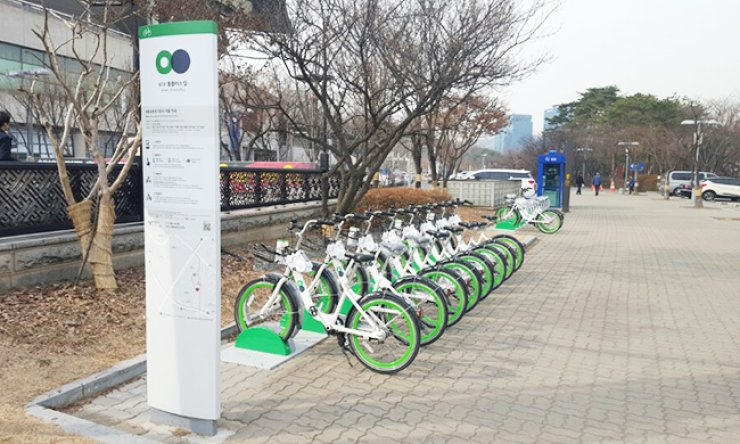

**Introduction :**

SEOUL BIKE, is an un-manned rental system based in the seoul city of the south korea, that can be conveniently used anywhere, anytime by anyone.

The system was designed to resolve issues of traffic congestion, air pollution, and high oil prices in Seoul, and to build a healthier society while enhancing the quality of life for Seoul citizens.

The number of bicycle users in Seoul increased steadily and the cumulative number of rentals exceeded 90 million as of December 2021

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays. In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data



**Dataset :**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Based on this historical data and various relevant factors we will develop a machine learning model that can accurately predict the demand for bike rentals in Seoul

**Seoulbikedata.csv :** contains historical data of previous usage of the bikes and the diffrent weather informations. There are total 14 features in this dataset

# **GitHub Link -**

https://github.com/hbansal27/ML_Regression_Bike_Sharing_Demand_Prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

sobasically we have to do **Prediction of bike count required at each hour for the stable supply of rental bikes.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries



In [27]:
# Import Libraries
#There are lots of libraries present in Python; we are importing some of them, which will be used further in this project.

# Import Libraries
import numpy as np
import pandas as pd

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings("ignore")

#Import other
from datetime import datetime
from importlib import reload

### Dataset Loading

In [28]:
# Load Dataset from github repository
# Below is the link of the github repository where we have uploaded our dataset
sb_data_url = 'https://raw.githubusercontent.com/hbansal27/ML_Regression_Bike_Sharing_Demand_Prediction/main/SeoulBikeData.csv'


In [29]:
# Now we are going to read the dataset
sb_data = pd.read_csv(sb_data_url, encoding='unicode_escape')

### Dataset First View

In [30]:
# Dataset First Look
#Here we are going to take a look at the data that how its look like so we are using
#head() function which by default gives us the top 5 rows of the data
#and tail() function which gives us the bottom 5 rows of the data



In [31]:
# View first 5 rows of the dataset
sb_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [32]:
# View last 5 rows of the dataset
sb_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [33]:
# Dataset Rows & Columns count
#Here we are using shape function which tells us about the numbers of rows and columns in the dataset
print(f"The shape of seoul bike dataset is {sb_data.shape}")
print(f"Number of Rows in seoul bike dataset is     -  {sb_data.shape[0]}")
print(f"Number of Columns in seoul bike dataset is  -  {sb_data.shape[1]}")




The shape of seoul bike dataset is (8760, 14)
Number of Rows in seoul bike dataset is     -  8760
Number of Columns in seoul bike dataset is  -  14


### Dataset Information

In [34]:
# Dataset Info
sb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [35]:
# Dataset Duplicate Value Count
sb_data.duplicated().value_counts()

False    8760
dtype: int64

Total Number of Duplicate values in seoul bike dataset is 0

#### Missing Values/Null Values

In [36]:
# Missing Values/Null Values Count
# Checking missing values/null values count for each column
sb_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

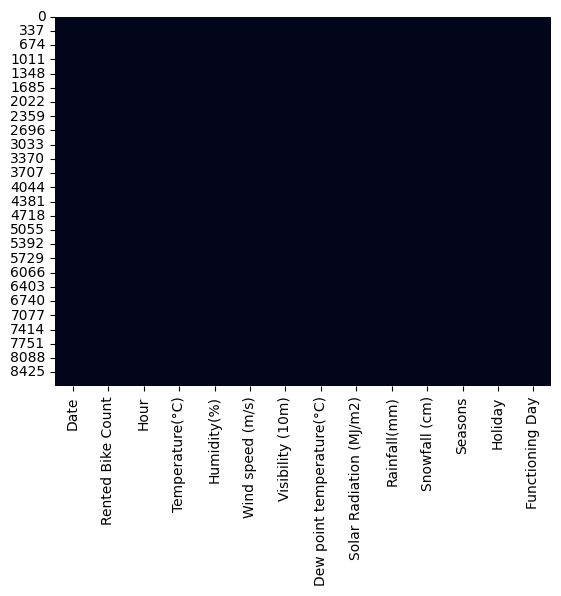

In [37]:
# Visualizing the missing values
#To see the missing data we are going to use the heatmap method.
sns.heatmap(sb_data.isnull(), cbar=False)

### What did you know about your dataset?

### **Dataset info :**

Bike Seoul dataset has **14 variables** and **8760 observations**.

where Rented Bike Count is the dependent variable column.

There are **no duplicate rows** in the dataset.

Also there are **no missing values** or **no Null values** in the dataset.

## ***2. Understanding Your Variables***

In [38]:
# Dataset Columns
sb_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [39]:
# Dataset Describe
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
sb_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description

### **The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**


**Attribute Information:**

* Date : Date of Rented Bike
* Rented Bike count - Number of total rentals
* Hour - Hours of the day
* Temperature-Temperature in Celsius
* Humidity - Humidity of the day in %
* Windspeed - Wind speed in m/s
* Visibility - Atmospherical Visibility within 10 meter range
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - Rain fall in mm
* Snowfall - Snow fall in cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - Whether the day is neither a weekend nor holiday

### Check Unique Values for each variable.

In [40]:
# Check Unique Values for each variable.
sb_data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**1. Date column** has 365 unique values/Out of which "01/12/2017" is most common date with highest count(24)

**2. Rented Bike Count  column** has 2166 unique values.

**3. Hour column** has 24 unique values,with mean value of 11.50 Hours.

**4.Temperature(°C) column** has 546 unique values.

**5. Humidity(%) column** has 90 unique values.

**6. Wind speed (m/s) column** has 65 unique values.

**7. Visibility (10m) column** has 1789 unique values.

**8. Dew point temperature(°C) column** has 556 unique values.

**9. Solar Radiation (MJ/m2) column** has 345 unique values.

**10. Rainfall(mm) column** has 61 unique values,with mean value of 0.15mm.

**11. Snowfall (cm) column** has 51 unique values,with mean value of 0.08cm.

**12. Seasons column** has 4 unique values/Out of which "Spring" is most common season

**13. Holiday column** has 2 unique values.

**14. Functioning Day column** has 2 unique values.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [41]:
#Making a copy of dataset
#Before doing any data wrangling we are creating copy of our original dataset so any changes don't affect our original dataset
sb=sb_data.copy()

In [42]:
#Renaming the columns
sb.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)


In [43]:
#Columns in copied dataset
sb.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [44]:
#Converting date variable in to datetime datatype
sb['date'] = pd.to_datetime(sb['date'])

In [45]:
#Creating new column for month in dataset
sb['month']=sb['date'].apply(lambda x : x.month)

In [46]:
#Creating new columns for day in dataset
sb['day']=sb['date'].apply(lambda x : x.strftime('%A'))

In [47]:
#Dropping the date column
#Here we are dropping the date column because it don't have any significance in further analysis
sb.drop(['date'],inplace=True,axis=1)

In [48]:
sb.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday


In [49]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [50]:
# defining dependent variable
dependent_variable = ['rented_bike_count']

In [51]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day']

### What all manipulations have you done and insights you found?

Since the data we possess is already clean and well-structured, there is no requirement for us to make any alterations in this aspect

However, we have made modifications to the columns, including creating and deleting some of them. These adjustments were made to uncover meaningful patterns and gain insights based on the data.

1. Converting the 'Date' column to datetime format:
     This allows for easier manipulation and analysis of date-related information.

2. Creating new columns:

       a.) month': A new column named 'month' is created in the DataFrame using
                   the 'Date' column. It extracts the month value (e.g., 1, 2, 3) from the date.

        b.) 'day': Another new column named 'day' is created in the DataFrame
                   using the 'Date' column. It extracts the day (e.g., Monday, Tuesday) from the date.


3. Dropping the 'date' column: we have dropped the date column from our dataframe because it will not give any kind of insights or patterns.              

Insights and analysis:

The manipulations performed on the dataset provide additional features related to the date, such as the day, month. These new columns allow for a more detailed analysis of the bike rental patterns based on different time dimensions.

With the added columns, you can now explore insights such as:
- The distribution of bike rentals across weekdays (e.g., higher rentals on weekdays compared to weekends).
- Monthly trends in bike rentals (e.g., higher rentals during summer months).


We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

Finally, we have 8760 rows and 15 columns of data that can be used to analyze and gain valuable insights into the business. With this data, we can make informed decisions and accurately predict future trends.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **`1).Univariate Analysis of Target Variable(rented_bike_count)`**

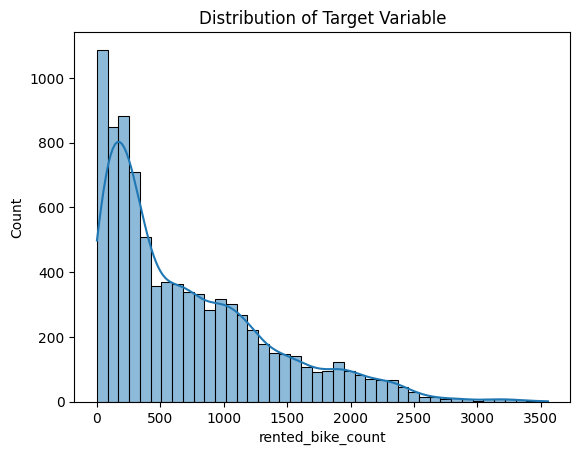

In [52]:
# Distribution of Target Variable (count)
sns.histplot(data=sb, x='rented_bike_count', kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

* A histogram is a graphical representation of the **distribution of a dataset**.

* It is a useful tool in statistics and data analysis as it allows us to quickly see **how the data is distributed and identify patterns or outliers.**

##### 2. What is/are the insight(s) found from the chart?

* ***Right-skewed distribution of the target variable*** "Rented Bike Count" indicates that most rental counts for bikes fell towards the lower end of the scale, with a few exceptions having a high rental count.

* Since most of the observations in the dataset have a rental tally between 0 and 1000 per hour, the ***histogram's peak falls between 0 and 1000 bike rentals per hour.***

* The histogram's right side has a lengthy tail, which suggests that ***there are some extreme values*** with high rental counts that could be regarded as outliers.
* When using statistical techniques on the data, it's crucial to bear in mind that the distribution of the ***target variable is not normally distributed***, as the chart illustrates.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from the distribution plot of the target variable can be used to optimize the bike rental business, such as **adjusting bike rental prices, increasing or decreasing bike availability, or identifying peak times** for marketing and promotions.

### **`2).Number of bikes rented per month?`**

In [53]:
#grouping the data according to month
monthly_prediction=round(sb.groupby('month')['rented_bike_count'].sum().reset_index(),2)

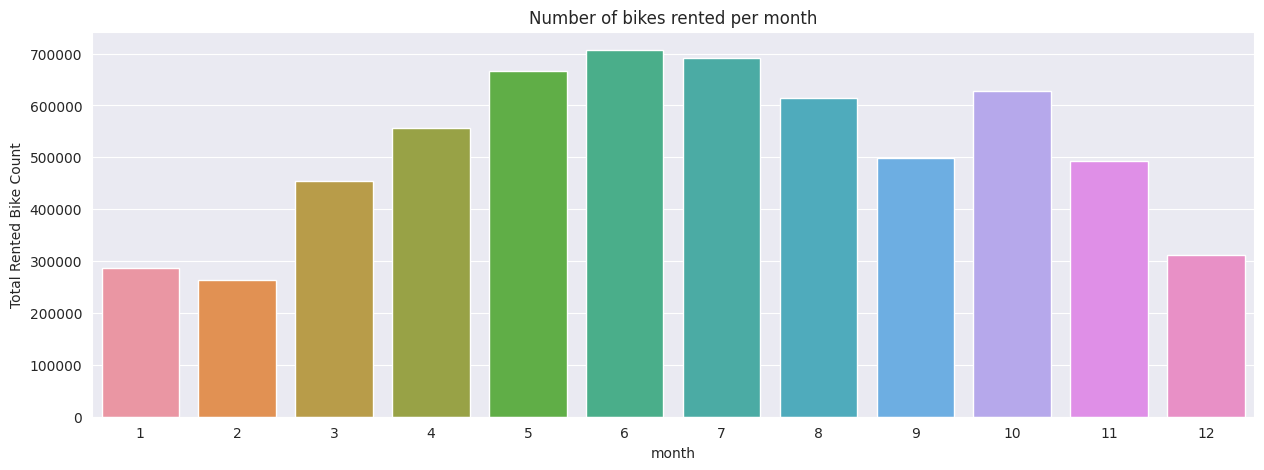

In [54]:
# Number of bikes rented per month
plt=reload(plt)
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(x='month',y='rented_bike_count',data=monthly_prediction)
plt.title("Number of bikes rented per month")
plt.ylabel('Total Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for this use case because it clearly visualizes the frequency and sum of each category, making it easy to compare the number of bike rentals per month. It also allows you to quickly spot any trends in the data, such as an increase or decrease in bike rentals over time.

##### 2. What is/are the insight(s) found from the chart?

We find that in the middle of the year, rented bike demand is highest. The bike demand in May, June, and July is more than 650000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is likely due to the warmer weather and increased outdoor activities during the summer months. To meet the higher demand, bike rental companies need to add more bikes and staff during this period.

### **`3).Avg bike demand every hour and every day?`**

In [55]:
#grouping the data according to days
daily_prediction=round(sb.groupby(['day','hour'])['rented_bike_count'].mean().reset_index(),2)

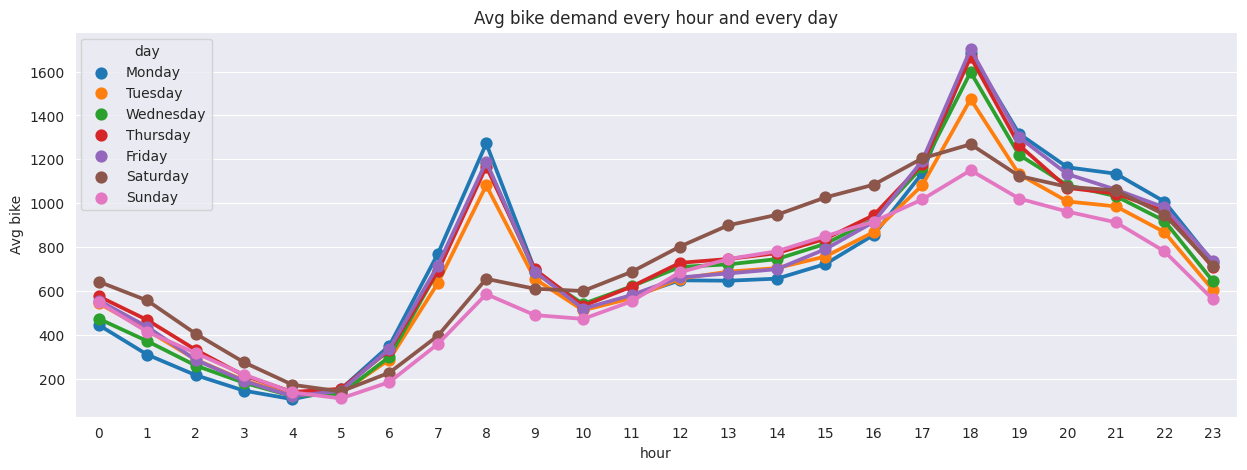

In [56]:
plt=reload(plt)
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
hue_order=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.pointplot(x='hour',y='rented_bike_count',data=daily_prediction,hue='day',hue_order=hue_order)
plt.title('Avg bike demand every hour and every day')
plt.ylabel('Avg bike')
plt.show()

##### 1. Why did you pick the specific chart?

We choose the pointplot becouse its allows you to compare the average bike demand for different weekdays and also see the trend of the data for each weekday. This makes it easier to identify patterns in the data and analyse the effect of different factors on bike demand.

##### 2. What is/are the insight(s) found from the chart?

Insights:

1.   Rentel bikes are in high demand on the first five days of the week between 7 a.m. and 9 a.m.
2.   Rentel bikes are in high demand on the first five days of the week, between 5 and 7 pm.
3.   There is a low demand on Saturday and Sunday compared to other days of the week



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

During the week, people are focused on the activities that require them to commute, such as work, school, and errands. On the weekends, they are more likely to partake in activities that don't require them to leave the house, like going to the movies, out to dinner, or just hanging out with friends. By understanding the daily patterns of people's lives, businesses can make informed strategies to optimize their services and increase their profits.

### **`4). Correlation Heatmap`**

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It’s like a color chart 🌈 that shows us how closely related different variables are.

In [57]:
# Finding correlation between different columns
sb.corr()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,month
rented_bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.036729e-15
temperature,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02
humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02
wind_speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02
visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02
dew_point_temp,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02
solar_radiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02
rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02
snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02


Text(0.5, 1.0, 'Corelation Heatmap for Seoul bike data')

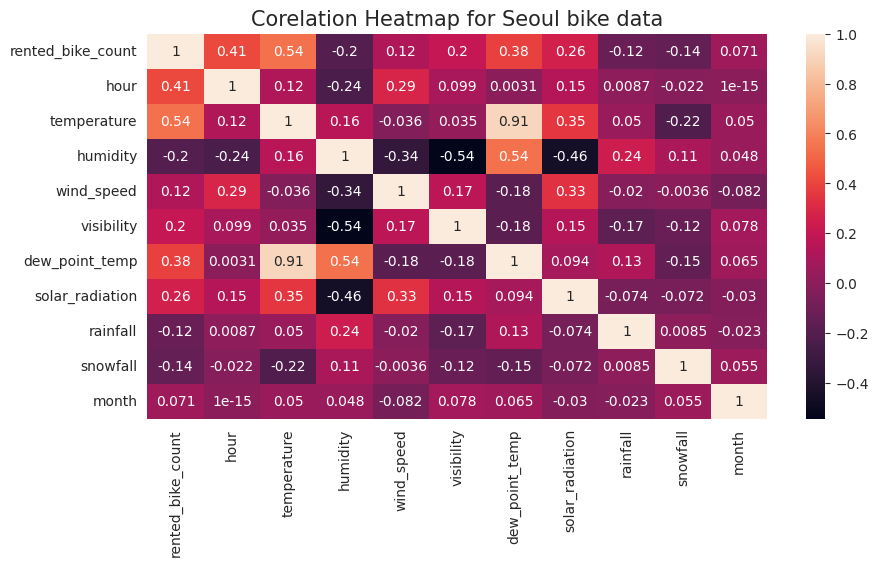

In [58]:
# Heat map for Seoul bike data
plt.figure(figsize = (10,5))
sns.heatmap(sb.corr(), annot= True)
plt.title('Corelation Heatmap for Seoul bike data', size=15)

##### 1. Why did you pick the specific chart?

we chose correlation heatmap to examine the relationships between different variables in the dataset. The heatmap allows for a visual representation of the correlation coefficients, providing insights into the strength and direction of the relationships.

##### 2. What is/are the insight(s) found from the chart?

* There is a strong positive correlation between the **rented_bike_count** and **temprature** column.

* The **rented_bike_count** is slightly negatively correlated with the **humidity, rainfall, and snowfall.** This means that as the weather condition changes, the total number of bike rental fall slightly.


### **`5).Effect of the season on bike rental?`**

In [59]:
#grouping the data according to seasons
season_prediction=sb.groupby(['seasons'])['rented_bike_count'].sum()
print(season_prediction)


seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: rented_bike_count, dtype: int64


Text(0.5, 1.0, 'Effect of Seasons on the Number of bikes rental')

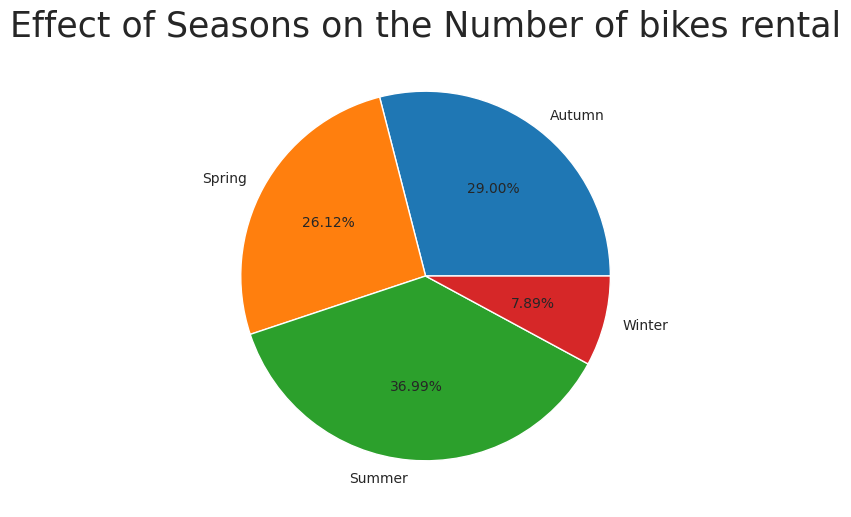

In [60]:
# Seasons v/s Number of bikes rented
plt.figure(figsize=(6,6))
explode = [0.2,0]
plt.pie(season_prediction,labels=season_prediction.index, startangle=0,autopct="%.2f%%")
plt.title('Effect of Seasons on the Number of bikes rental',size = 25)

##### 1. Why did you pick the specific chart?

We chose the pie chart because this chart can be used to compare data in percentage form. and we want to get comparison of the rented bike count distribution among seasons

##### 2. What is/are the insight(s) found from the chart?

Highest Season: The largest slice in the pie chart corresponds to the "Summer" season, indicating that it has the highest proportion of the rented bike count among all seasons.

Lowest Season: The smallest slice in the pie chart corresponds to the "Winter" season, indicating that it has the lowest proportion of the rented bike count among all seasons.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights regarding the distribution of rented bike count among seasons can assist in resource allocation. The business can allocate resources such as bikes, staff, and marketing efforts more efficiently during peak seasons (e.g., Summer) to meet the higher demand. This can result in improved customer satisfaction and increased revenue.


### **`6).Effect of temprature on the bike rental counts?`**

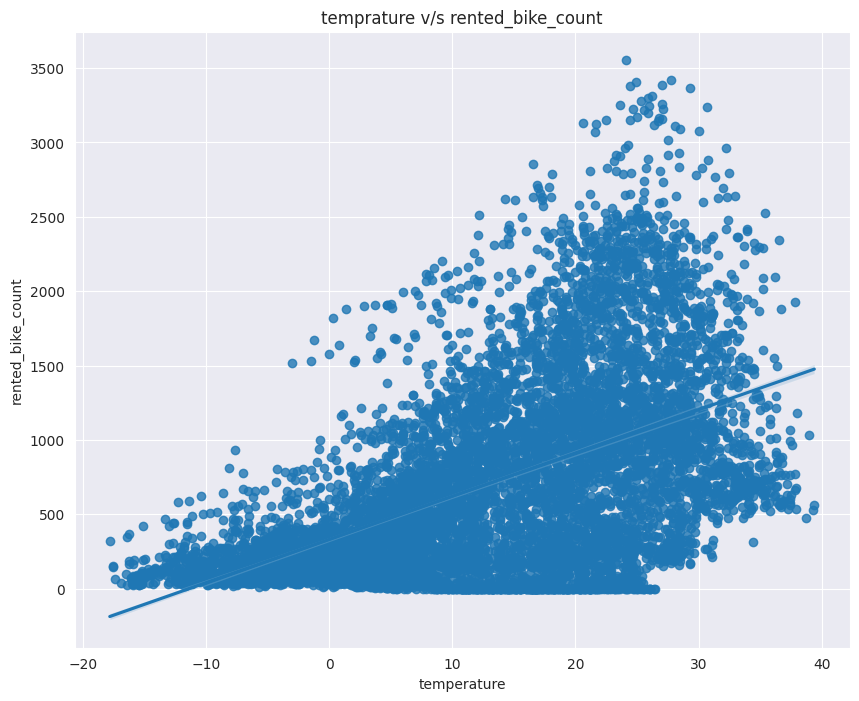

In [61]:
#Analyzing the relationship between the temprature and the bike rental counts
plt.figure(figsize=(10,8))
sns.regplot(x='temperature', y='rented_bike_count', data=sb)
plt.title('temprature v/s rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.

##### 2. What is/are the insight(s) found from the chart?

From above regression plot we can see that there is some linearity between temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Insights gained from this chart, such as the relationship between temperature and bike rentals, can potentially help businesses in the bike-sharing industry create a positive impact.
* For example, bike-sharing companies can use this insight to plan their operations and marketing strategies, such as ***offering promotions during periods of increase in temperatures to incentivize bike rentals or allocating more resources to locations where temperature has a stronger impact on rental demand.***
* This can lead to increased revenue and customer satisfaction, which can ultimately contribute to the positive impact of the business.

### **`7).Effect of humidity on the bike rental counts?`**

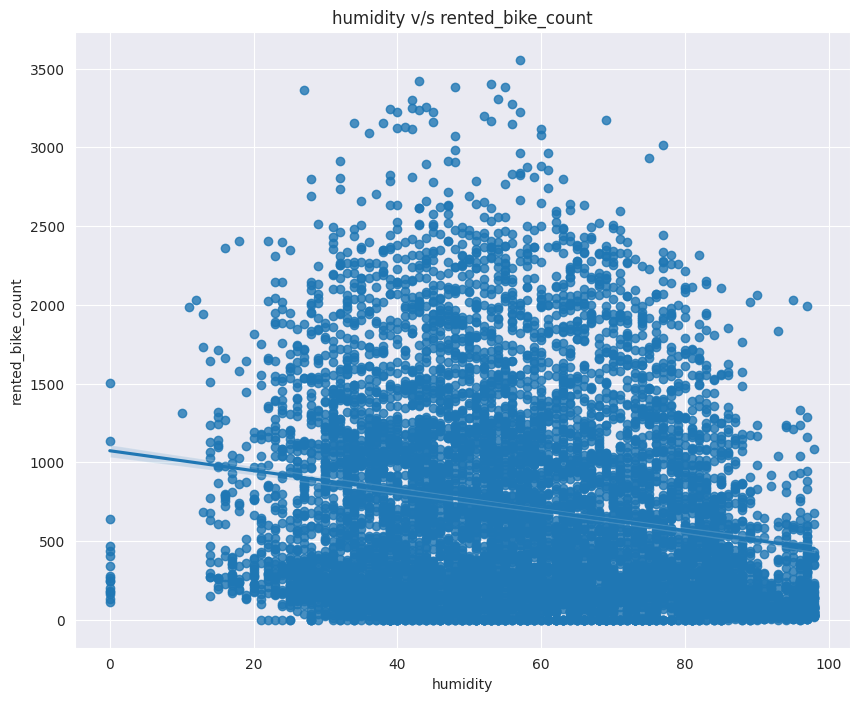

In [62]:
#Analyzing the relationship between the humidity and the bike rental counts
plt.figure(figsize=(10,8))
sns.regplot(x='humidity', y='rented_bike_count', data=sb)
plt.title('humidity v/s rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.

##### 2. What is/are the insight(s) found from the chart?

A potential relationship between humidity levels and bike rental demand, with ***higher humidity levels possibly leading to lower bike rental demand.***
     
A potential threshold effect, where humidity levels below a certain point do not affect bike rental demand, but **once the threshold is crossed, there is a rapid decrease in bike rental demand.**
    

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the factors that drive bike rental demand, the company can **make informed decisions to optimize their operations and improve their service**, potentially resulting in increased revenue and customer satisfaction

### **`8).Effect of Holidays on bike rental counts?`**

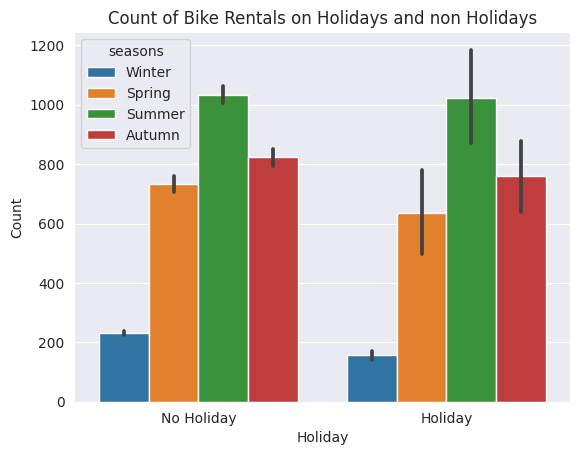

In [63]:
#Count of bike rentals on holidays vs non holidays
sns.barplot(data=sb, x='holiday', y='rented_bike_count',hue='seasons')
plt.title('Count of Bike Rentals on Holidays and non Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Barplots allow for easy comparison of values across different categories
.

##### 2. What is/are the insight(s) found from the chart?

* The insight from the chart is that there are ***more bike rentals on non-holidays than on holidays.***
* This may suggest that people are ***more likely to use bikes for daily commutes*** or recreational activities rather than for transportation during holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows that bike rentals on holidays are significantly lower than on non-holidays, this could suggest that there is lower demand for bike rentals on holidays, and a business may need to adjust their operations and marketing strategies accordingly.

### **`9).Effect of Wind speed on bike rental counts?`**

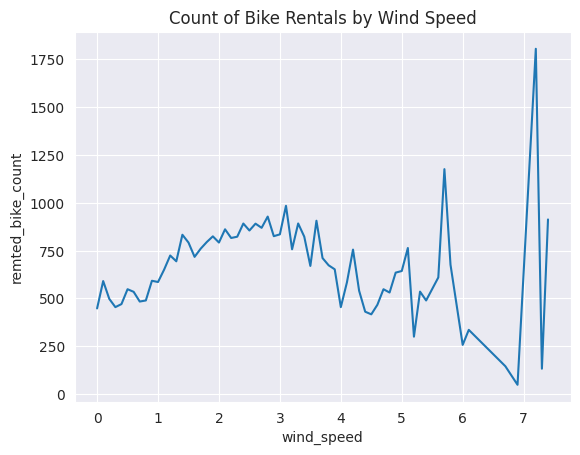

In [65]:
#BIke rental counts by wind speed
sns.lineplot(data=sb, x='wind_speed', y='rented_bike_count', ci=None)
plt.title('Count of Bike Rentals by Wind Speed')
plt.xlabel('wind_speed')
plt.ylabel('remted_bike_count')
plt.show()



##### 1. Why did you pick the specific chart?

Line plots can be used to visualize relationships between two or more variables.

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gleaned from this chart include:

     * There is a ***slight decrease in bike rentals as wind speed increases from 0 to around 8 m/s,*** after which bike rentals remain relatively stable.
The ***relationship between wind speed and bike rentals is not very strong***, as indicated by the relatively flat trendline.
     

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The line plot could reveal whether there are certain wind speed conditions that are particularly conducive to bike rentals.

If so, bike-sharing companies could adjust their operations (e.g., increase the number of bikes available during those times) to better meet demand and potentially increase revenue.

### **`10).Box plot of Bike Sharing Demand.`**

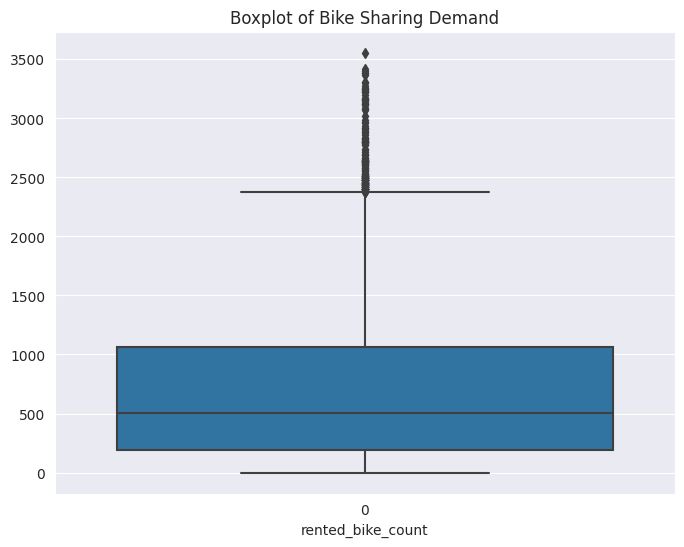

In [67]:
#visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(sb['rented_bike_count'])
plt.xlabel('rented_bike_count')
plt.title('Boxplot of Bike Sharing Demand')
plt.show()

##### 1. Why did you pick the specific chart?

We chose the boxplot to analyze the distribution of bike sharing demand. The boxplot displays statistical information such as the median, quartiles, and potential outliers. It provides insights into the central tendency, spread, and skewness of the demand data.

##### 2. What is/are the insight(s) found from the chart?

Insights gained from the boxplot:

Central tendency: The median line in the boxplot represents the median demand, indicating the typical demand level.

Spread: The box's height indicates the interquartile range (IQR), showing the range within which most of the data falls. The whiskers extend to the minimum and maximum values within a certain range.

Outliers: Any data points outside the whiskers are considered outliers and may be worth investigating for potential anomalies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying outliers can help uncover unusual demand patterns or errors in data recording.
Understanding the distribution and spread of demand can assist in capacity planning, resource allocation, and inventory management.
Comparing boxplots across different periods or segments (e.g., seasons) can reveal variations in demand patterns and guide decision-making.

### **`11).Pair Plot?`**

In [ ]:
# Pair Plot visualization code
# Create the pairplot using Seaborn
sns.pairplot(sb,hue='seasons', vars=['temperature', 'humidity','hour',
       'wind_speed', 'rented_bike_count'])

##### 1. Why did you pick the specific chart?

* By using pairplot we can visualize the pairwise relationships between the variables in the dataset, while also seeing how these relationships differ across different hours of the day.

* This can help us identify any patterns or trends that may exist between the variables, and how they may be affected by the time of day.

##### 2. What is/are the insight(s) found from the chart?

* Possible insights that can be gained from the pairplot are:

     * ***The relationship between temperature and bike rentals***, with warmer temperatures generally correlating with higher rental counts.
     
     * ***The relationship between humidity and bike rentals***, with lower humidity levels generally correlating with higher rental counts.
     
     * ***The relationship between wind speed and bike rentals***, which may suggest that higher wind speeds negatively impact bike rentals.
     
     * **The differences in these relationships across different seasons**, with some seasons showing stronger correlations than others.
     
     * Possible correlations between pairs of variables, such as the correlation between temperature and humidity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***